# Maximal coverage Problem (MCP)- Case: Ohio Banking Problem

## Problem Background And Description
Prior to 1979, banks in Ohio were only allowed to place branches in a county where the bank
had a principal place of business. A new law in 1979 allowed banks to put branches in any
county where the bank has a principal place of business and in any county adjacent to one in
which it has a principal place of business. The question posed is, What is the minimum number
of principal places of business, and in which counties should they be located to enable branches
in all eighty-eight counties of Ohio? A county map of Ohio is shown in Figure 1.

## Objective and Prerequisites
Based on privious found in set cover problem where the constraints ensure that for each of the 88 counties, the county has a principal place of business or a county adjacent to it has a principal place of business. We found that the best solution is to open 15 locations of branchs. However, we 
want to learn how this plan will change if we taken Populdation into consideration.  

The population of each county is available from census data, and we may use that as a proxy for banking business. We may use an extension of the set cover model to solve a related problem known as the maximal coverage problem (MCP), We can use an MCP model to maximize the population reached, given a limit 15 on the number of principal places of business opened


## Solution Approach

Configure an Ohio Banking Problem to provide signal coverage to the largest number of people possible? In this example. We’ll show you how to construct a mixed-integer programming (MIP) model of the problem, implement this model in the Gurobi Python API, and find an optimal solution using the Gurobi Optimizer.

Our mathematical optimization model has five components, namely:
* Parameters.
* Decision variables.
* Objective function(s).
* Constraints.

We now present a mixed-integer programming (MIP) formulation for the Ohio Banking Problem.

## Model Formulation

### Parameters 
Let $pop_{i}  \in R$.  This variable $pop_{i} $ to be the population of county $ i $; $ i $ = 1, 2, . . ., 88.

### Decision Variables
Let $x_{j} \in \{0, 1 \} $.  This variable  $x_{j} = 1 $ if we place a principal place of business in county $ j $  and 0 if not; $ j $ = 1, 2, . . ., 88.

Let $y_{i} \in \{0, 1 \} $.  This variable  $y_{i} = 1 $ if county $ i $ is covered and 0 if not; $ i $ = 1, 2, . . ., 88.

Let $a_{ij} \in \{0, 1 \} $.  This variable $a_{ij} = 1 $ if county $ i $ and county $ j $ share a border and 0 if not (note that $a_{ii} = 1 $). 

We have the following MCP model:


### Objective Function(s)

- **Population covered**. We seek to maximize the total population covered by the branches. Note that by virtue of $y_{i}$ being binary, the population of each county will be counted only once.

\begin{equation}
\text{Maximize} \quad \sum_{i=1}^{88} pop_{i} \cdot y_{i}
\tag{0}
\end{equation}

### Constraints

- **Coverage**. Constraint 1 Ensures that a county ${i} $ is covered only if it or an adjacent county is selected as a principal place of business

\begin{equation}
\sum_{j=1}^{88} a_{ij} \cdot x_{j} \geq y_{i} \quad \forall {i} = 1,2....88
\tag{1}
\end{equation}


- **Limited Places**. Constraint 2 Ensures that no more than $k$ principal places of business are selected.

\begin{equation}
\sum_{j=1}^{88} x_{j}  \leq k \quad 
\tag{2}
\end{equation}

- **Binary**. Constraint 3 & 4 Ensures that all $x_{j}$ and $y_{i}$ are binary.

\begin{equation}
x_{j} \in \{0, 1 \}  \quad \forall {j} = 1,2....88
\tag{3}
\end{equation}

\begin{equation}
y_{i} \in \{0, 1 \}  \quad \forall {i} = 1,2....88
\tag{4}
\end{equation}



In [1]:
# %pip install gurobipy

In [2]:
# import library and read 2011 & 2020 Ohio Population 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

# load
df1 = pd.read_csv('Ohio_Population.csv') 

In [3]:
df1

,id,County_Code,County Name,2020,2011
0,0500000US39001,30,"Adams County, Ohio",27477,28459
1,0500000US39003,16,"Allen County, Ohio",102206,105988
2,0500000US39005,59,"Ashland County, Ohio",52447,53252
3,0500000US39007,80,"Ashtabula County, Ohio",97574,101085
4,0500000US39009,68,"Athens County, Ohio",62431,65079
...,...,...,...,...,...
83,0500000US39167,71,"Washington County, Ohio",59771,61607
84,0500000US39169,62,"Wayne County, Ohio",116894,114649
85,0500000US39171,1,"Williams County, Ohio",37102,37584
86,0500000US39173,21,"Wood County, Ohio",132248,127124


In [4]:
import gurobipy as gp
from gurobipy import GRB

In [5]:
df1_2011 = df1[["County_Code","2011"]]
df1_2020 = df1[["County_Code","2020"]]

In [6]:
# Parameters
# set k = 15, limiting max number of branches to build
k = 15

In [7]:
# Population are online open data from Census Population, U.S. Census Bureau
df1_2020 = df1_2020.set_index("County_Code").T.to_dict('records')
regions, population = gp.multidict(df1_2020[0])

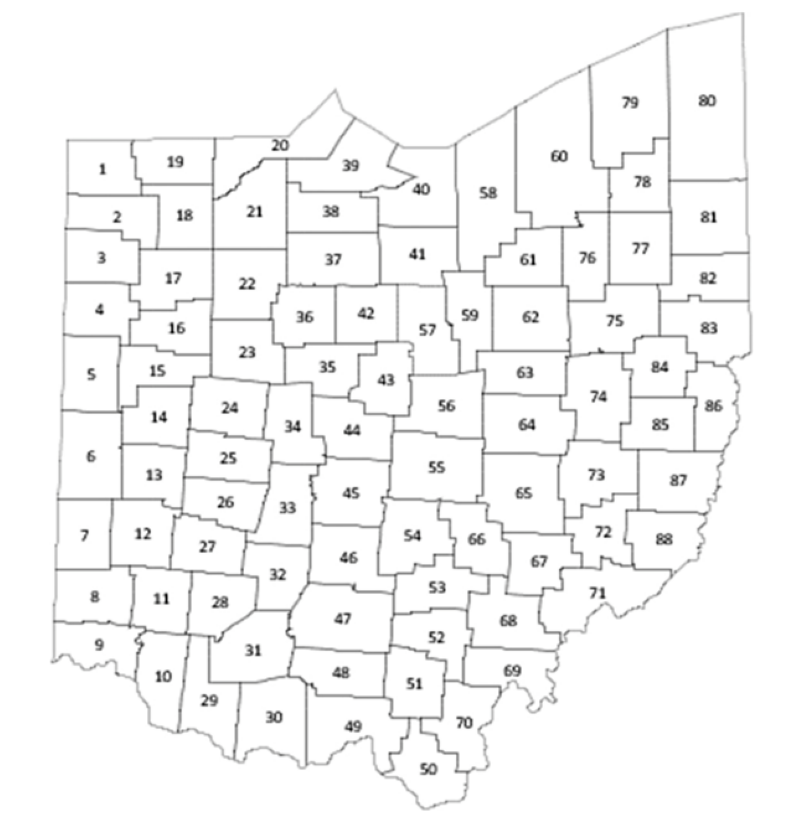

In [8]:
# showing the map
img = mpimg.imread('Picture1.png')  

plt.figure(figsize = (15,15))
plt.imshow(img) 
plt.axis('off') 
plt.show()

In [9]:
# Assume that the cost to build each branch at each county is 1.
# We follow the tutorial map above to set the coverage 

sites, coverage, cost = gp.multidict({
    1: [{1,2,19,18}, 1],
    2: [{1,2,3,17,18}, 1],
    3: [{2,3,4,17}, 1],
    4: [{3,4,5,15,16,17}, 1],
    5: [{4,5,6,14,15}, 1],              
    6: [{5,6,7,12,13,14,15}, 1],     
    7: [{6,7,8,12}, 1], 
    8: [{7,8,9,11,12}, 1],    
    9: [{8,9,10,11}, 1],    
    10: [{9,10,11,28,29}, 1],    
    11: [{8,9,10,11,12,27,28}, 1],   
    12: [{6,7,8,11,12,13,26,27}, 1],
    13: [{6,12,13,14,25,26}, 1],   
    14: [{5,6,13,14,15,24,25}, 1],      
    15: [{4,5,6,14,15,16,23,24}, 1],  
    16: [{4,15,16,17,22,23}, 1],  
    17: [{2,3,4,16,17,18,21,22}, 1],       
    18: [{1,2,17,18,19,20,21,22}, 1],       
    19: [{1,18,19,20}, 1],    
    20: [{18,19,20,21,39}, 1], 
    21: [{17,18,20,21,22,37,38,39}, 1],      
    22: [{16,17,18,21,22,23,36,37}, 1],    
    23: [{15,16,22,23,24,34,35,36}, 1],
    24: [{14,15,23,24,25,34}, 1],
    25: [{13,14,24,25,26,33,34}, 1],  
    26: [{12,13,25,26,27,33}, 1],  
    27: [{11,12,26,27,28,32,33}, 1],   
    28: [{10,11,27,28,29,31,32}, 1] , 
    29: [{10,28,29,30,31}, 1],    
    30: [{29,30,31,48,49}, 1],    
    31: [{28,29,30,31,32,47,48}, 1],        
    32: [{27,28,31,32,33,46,47}, 1], 
    33: [{25,26,27,32,33,34,45,46}, 1],    
    34: [{23,24,25,33,34,35,44,45}, 1],   
    35: [{23,34,35,36,42,43,44}, 1], 
    36: [{22,23,35,36,37,42}, 1],    
    37: [{21,22,36,37,38,41,42}, 1],          
    38: [{21,37,38,39,40,41}, 1] ,   
    39: [{20,21,38,39,40}, 1],   
    40: [{38,39,40,41,58}, 1],   
    41: [{37,38,40,41,42,57,58,59}, 1],
    42: [{35,36,37,41,42,43,57}, 1], 
    43: [{35,42,43,44,56,57}, 1],  
    44: [{34,35,43,44,45,55,56}, 1], 
    45: [{33,34,44,45,46,54,55}, 1],    
    46: [{32,33,45,46,47,53,54}, 1],  
    47: [{31,32,46,47,48,51,52,53}, 1],     
    48: [{30,31,47,48,49,51}, 1] ,
    49: [{30,48,49,50,51}, 1],    
    50: [{49,50,51,70}, 1],   
    51: [{47,48,49,50,51,52,70}, 1], 
    52: [{47,51,52,53,68,69,70}, 1], 
    53: [{46,47,52,53,54,66,68}, 1],    
    54: [{45,46,53,54,55,66}, 1], 
    55: [{44,45,54,55,56,64,65,66}, 1],   
    56: [{43,44,55,56,57,59,63,64}, 1],  
    57: [{41,42,43,56,57,59}, 1],  
    58: [{40,41,58,59,60,61}, 1] ,
    59: [{41,56,57,58,59,61,62,63}, 1],   
    60: [{58,60,61,76,77,78,79}, 1],       
    61: [{58,59,60,61,62,76}, 1], 
    62: [{59,61,62,63,75,76}, 1], 
    63: [{56,59,62,63,64,74,75}, 1],  
    64: [{55,56,63,64,65,73,74}, 1], 
    65: [{55,64,65,66,67,72,73}, 1],  
    66: [{53,54,55,65,66,67,68}, 1],  
    67: [{65,66,67,68,71,72}, 1], 
    68: [{52,53,66,67,68,69,71}, 1] ,
    69: [{52,68,69,70}, 1], 
    70: [{50,51,52,69,70}, 1],   
    71: [{67,68,71,72,88}, 1], 
    72: [{65,67,71,72,73,87,88}, 1], 
    73: [{64,65,72,73,74,85,87}, 1], 
    74: [{63,64,73,74,75,84,85}, 1], 
    75: [{62,63,74,75,76,77,82,83,84}, 1], 
    76: [{60,61,62,75,76,77,78}, 1],      
    77: [{60,75,76,77,78,81,82}, 1],      
    78: [{60,76,77,78,79,80,81}, 1] ,    
    79: [{60,78,79,80}, 1],   
    80: [{78,79,80,81}, 1],  
    81: [{77,78,80,81,82}, 1], 
    82: [{75,77,81,82,83}, 1], 
    83: [{75,82,83,84,86}, 1],  
    84: [{74,75,83,84,85,86}, 1], 
    85: [{73,74,84,85,86,87}, 1],   
    86: [{83,84,85,86,87}, 1],  
    87: [{72,73,85,86,87,88}, 1], 
    88: [{71,72,87,88}, 1] 
})

### Model Deployment

We now determine the model for the Cell Tower Coverage Problem, by defining the decision variables, constraints, and objective function. Next, we start the optimization process and Gurobi finds the plan to build towers that maximizes  the coverage of the population given the budget allocated.

In [10]:
# MIP  model formulation
m = gp.Model("cell_tower")

x = m.addVars(range(1,len(sites)+1), vtype=GRB.BINARY, name="x")
y = m.addVars(range(1,len(regions)+1), vtype=GRB.BINARY, name="y")

m.addConstrs((gp.quicksum(x[t] for t in sites if r in coverage[t]) >= y[r]
                        for r in regions), name="Build2cover")

m.addConstr(x.prod(cost) <= k, name="k")

m.setObjective(y.prod(population), GRB.MAXIMIZE)

m.optimize()

Restricted license - for non-production use only - expires 2023-10-25
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 89 rows, 176 columns and 728 nonzeros
Model fingerprint: 0x3fed6a11
Variable types: 0 continuous, 176 integer (176 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+04, 1e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 2e+01]
Found heuristic solution: objective -0.0000000
Presolve removed 0 rows and 11 columns
Presolve time: 0.01s
Presolved: 89 rows, 165 columns, 672 nonzeros
Variable types: 0 continuous, 165 integer (165 binary)
Found heuristic solution: objective 4895129.0000

Root relaxation: objective 1.179945e+07, 100 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node 

## Analysis
The result of the optimization model shows that the maximum population that can be covered with the 15 branches. Let's see the solution that achieves that optimal result.

### Ohio banking Build Plan

This plan determines at which counties in Ohio to build a branch.

In [11]:
# Display optimal values of decision variables

for branch in x.keys():
    if (abs(x[branch].x) == 1):
        print(f"\n Build a branch at location County Code {branch}.")


 Build a branch at location County Code 4.

 Build a branch at location County Code 8.

 Build a branch at location County Code 14.

 Build a branch at location County Code 18.

 Build a branch at location County Code 29.

 Build a branch at location County Code 33.

 Build a branch at location County Code 35.

 Build a branch at location County Code 38.

 Build a branch at location County Code 51.

 Build a branch at location County Code 55.

 Build a branch at location County Code 59.

 Build a branch at location County Code 68.

 Build a branch at location County Code 75.

 Build a branch at location County Code 78.

 Build a branch at location County Code 87.


### Demand Fulfillment Metrics

- **Coverage**:Number of the population covered by the branches built.

In [12]:
# Number of the population covered by the branches built is computed as follows.

total_population_coverage = int(m.objVal)
cover_ratio  = round(100* total_population_coverage/ sum(population.values()) ,2)

print(f"\n The Total population coverage associated to the branches build plan is: {total_population_coverage} people, \n which covered {cover_ratio} %")


 The Total population coverage associated to the branches build plan is: 11799448 people, 
 which covered 100.0 %


##  Conclusion

In this example, we address the extension problem of building branches in Ohio to provide signal coverage  to the largest number of people while satisfying a budget constraint. We learned how to formulate the problem as a MCP model. Also, we learned how to implement the MCP model formulation and solve it using the Gurobi Python.

## References

[1] Jeffrey D. Camm "How to Influence and Improve Decisions Through Optimization Models" INFORMS TutORials in Operations Research. http://pubsonline.informs.org

[2] Cell Tower Coverage Problem by Gurobi.  https://www.gurobi.com/resource/cell-tower-coverage-problem/